In [1]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
from netCDF4 import Dataset
import pylab as pl
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import matplotlib.cm as cm
from scipy.stats import f as scist

import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
% matplotlib inline

#Fitting the part. Th

In [2]:
import glob,csv
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
print len(nc_filename)
print("found *.csv file: \n{}".format(nc_filename))

19
found *.csv file: 
['/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_1.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/23_4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/38_2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', '/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv', 

In [3]:
file_num=14
marker=['o','o','o','o','^','s','s','s','s','s','s','D','D','>']

WLS_err1=np.empty([file_num,1])
WLS_coef1=np.empty([file_num,1])
WLS_errc=np.empty([file_num,1])
WLS_coefc=np.empty([file_num,1])
sinking_rate=np.empty([file_num,1])

rss1=np.empty([file_num,1])
rss2=np.empty([file_num,1])


1987 ARKIV/3 Stn1
ftest:1.0
slope:4.760350e-05,error:8.511518e-06
C1   :7.958720e-03,error:1.578750e-02
sinking   :5.608831e+02,error:1.002860e+02

1987 ARKIV/3 Stn2
ftest:0.00366997307459
slope:3.251742e-05,error:4.323728e-06
C1   :2.374377e-02,error:8.689076e-03
sinking   :8.210983e+02,error:1.091786e+02

1987 ARKIV/3 Stn3
ftest:1.0
slope:1.214268e-04,error:1.477151e-05
C1   :3.657874e-03,error:1.387682e-02
sinking   :2.198856e+02,error:2.674898e+01

1987 ARKIV/3 Stn4
ftest:0.458212519204
slope:4.790074e-05,error:4.440455e-05
C1   :5.556664e-02,error:4.980443e-02
sinking   :5.574027e+02,error:5.167190e+02

ASW 2000 Stn1
ftest:0.00115039232984
slope:2.526496e-05,error:1.674619e-05
C1   :5.857217e-02,error:1.539559e-02
sinking   :1.056800e+03,error:7.004711e+02

1991 ARCTIC EXPEDITION Stn1
ftest:0.000517751523517
slope:2.202961e-05,error:4.529694e-06
C1   :3.193731e-02,error:1.105161e-02
sinking   :1.212005e+03,error:2.492106e+02

1991 ARCTIC EXPEDITION Stn2
ftest:7.34790006618e-11
sl

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:3855: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


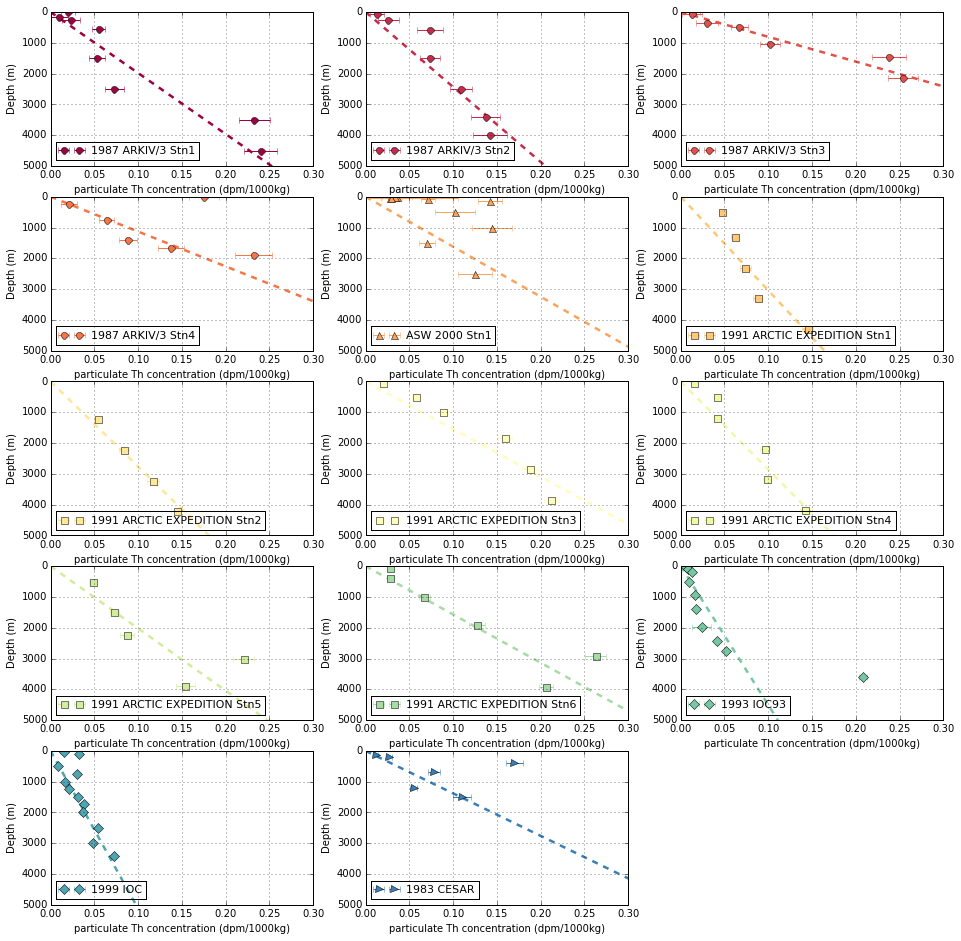

In [4]:
#ax = plt.figure(1,figsize=(10,7))
for j in range(file_num):

#j=13
#if j==13:
    data=pd.read_csv(nc_filename[j])

    y= data['depth'];
    name= data['name'][0];
    x=data['230Th part.'];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_part_err']
    x=np.ma.masked_where(x<=0,x)
    y=np.ma.masked_where(x<=0,y)
    err=np.ma.masked_where(x<=0,err)
    
    y2 = sm.add_constant(y,prepend=False)
    mod_wls = sm.WLS(x, y2, weights=1./err)
    res_wls = mod_wls.fit()
    
    ftest=sm.WLS(x, y, weights=1./err).fit()
    rss1[j]=ftest.mse_resid
    rss2[j]=res_wls.mse_resid
    p1 = 1
    p2 = 2
    n = file_num
    F = (ftest.mse_resid - res_wls.mse_resid)/(res_wls.mse_resid) *(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    WLS_err1[j,:] = res_wls.bse[0]
    WLS_coef1[j,:] = res_wls.params[0]
    sinking_rate[j,:]=0.0267/res_wls.params[0]
    err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.0267
  
    print ('')
    print (name)
    print ('ftest:%s'%p)
    print ('slope:%e,error:%e'%(res_wls.params[0],res_wls.bse[0]))
    print ('C1   :%e,error:%e'%(res_wls.params[1],res_wls.bse[1]))
    print ('sinking   :%e,error:%e'%(sinking_rate[j,:],err1[j,:]))

    
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Spectral(j*18)
    ax.plot([0, 5000],[0, 5000]/ftest.params[0], '--.',c=cc,linewidth=2.5)
    ax.errorbar(x, y,xerr=err, fmt=marker[j],markersize=7,c=cc,label=name)
    ax.legend(loc=3,fontsize=11)
    
    ax.set_ylim([0, 5000])
    ax.set_xlim([0, 0.3])
#    if j+1==1 or j+1==5 or j+1==9:
    plt.ylabel('Depth (m)')
#    if j+1==10 or j+1==11: #or j+1==9:
#        plt.xlabel('Particulate Th concentration (dpm/1000kg)')
    plt.xlabel('particulate Th concentration (dpm/1000kg)')
#    plt.ylabel('Depth (m)')
#    if not(j+1==9 or j+1==10 or j+1==11):
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==5 or j+1==9):
#        plt.setp(ax.get_yticklabels(), visible=False)
    plt.gca().invert_yaxis()
    plt.grid()
    #plt.tight_layout()
    #plt.subplots_adjust(wspace=.0000001, hspace=.0000001)
plt.show()

In [5]:
#f_test
p1 = 1
p2 = 2
n = file_num
F = (sum(rss1) - sum(rss2))/(sum(rss2)) *(n*n-p2*n)/(p2*n-p1*n)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

F ratio: -1.24745194505
ftest:1.0


#fitting the diss. Th

####(1) Change into fit Q-C{1}K{-1}-K{-1}Qz/S

In [6]:
WLS_err2=np.empty([file_num,1])
Kvalue=np.empty([file_num,1])
WLS_coef2=np.empty([file_num,1])


1987 ARKIV/3 Stn1
ftest:0.00327044707047
slope:6.194880e-01,error:3.850888e-01
C1   :1.637168e-01,error:6.765893e-02
('1987 ARKIV/3 Stn1', 'k_th', 1.6142362452696111)

1987 ARKIV/3 Stn2
ftest:0.0104892131084
slope:2.683252e+00,error:5.471281e-01
C1   :4.462788e-02,error:5.988301e-02
('1987 ARKIV/3 Stn2', 'k_th', 0.3726821254409679)

1987 ARKIV/3 Stn3
ftest:3.96394046901e-05
slope:5.563998e-01,error:9.102337e-02
C1   :6.103595e-02,error:1.829919e-02
('1987 ARKIV/3 Stn3', 'k_th', 1.7972686598706069)

1987 ARKIV/3 Stn4
ftest:5.25477756375e-06
slope:1.656468e+00,error:1.595662e-01
C1   :3.322266e-02,error:1.886268e-02
('1987 ARKIV/3 Stn4', 'k_th', 0.6036941198618645)

ASW 2000 Stn1
ftest:0.000520097829777
slope:3.760967e+00,error:9.198655e-01
C1   :2.119833e-02,error:4.679890e-02
('ASW 2000 Stn1', 'k_th', 0.26588909749656098)

1991 ARCTIC EXPEDITION Stn1
ftest:0.000514875440501
slope:2.285908e+00,error:9.666757e-01
C1   :2.019882e-01,error:1.139437e-01
('1991 ARCTIC EXPEDITION Stn1', 'k_t

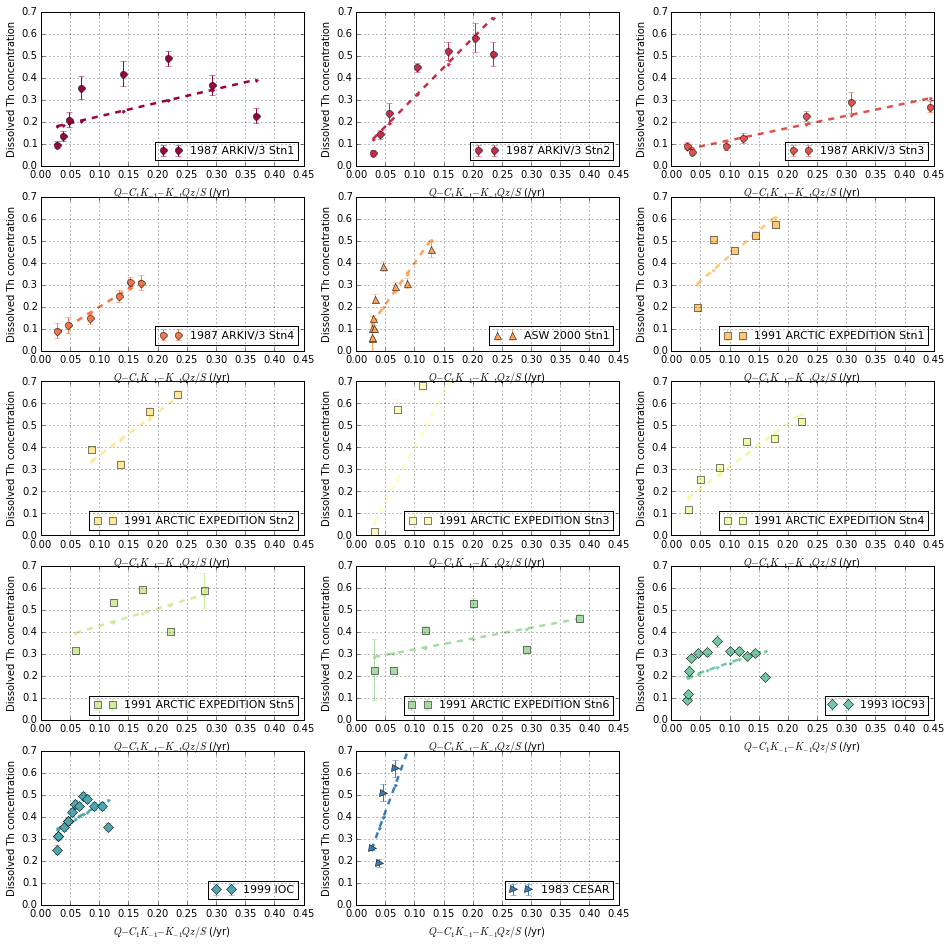

In [7]:
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    
    y= data['depth'];
    x= data['230Th diss.'];
    name= data['name'][0];
    lon = data['long.'];
    lat = data['lat.'];
    err =data['Th_diss_err']
    y2=np.empty(len(x))
    
    for k in range (len(x)):
        y2[k]=(0.0267-WLS_coef1[j,:]*1.6)+(0.0267*1.6/sinking_rate[j])*y[k]
    y3 = sm.add_constant(y2,prepend=False)
    mod_wls2 = sm.WLS(x,y3, weights=1./err)
    res_wls2 = mod_wls2.fit()
    Kvalue[j]=1/res_wls2.params[0]
    WLS_coef2[j]=res_wls2.params[0]
    WLS_err2[j]=res_wls2.bse[0]
    err2=res_wls2.bse[0]/res_wls2.params[0]*Kvalue
    
    ftest=sm.WLS(x, y, weights=1./err).fit()
    p1 = 1
    p2 = 2
    n = file_num
    F = (ftest.mse_resid - res_wls2.mse_resid)/(res_wls2.mse_resid) *(n-p2)/(p2-p1)
    p = 1.0 - scist.cdf(F,p2-p1,n-p2)
    
    print ('')
    print (name)
    print ('ftest:%s'%p)
    print ('slope:%e,error:%e'%(res_wls2.params[0],res_wls2.bse[0]))
    print ('C1   :%e,error:%e'%(res_wls2.params[1],res_wls2.bse[1]))
    
    ax = plt.figure(1,figsize=(16,16))
    ax = plt.subplot(5,3,j+1)
    cc=cm.Spectral(j*18)
    ax.plot(y2, res_wls2.fittedvalues, '--.',c=cc,linewidth=2.5)
    ax.errorbar(y2,x,yerr=err, fmt=marker[j],markersize=7,c=cc,label=name)    
    ax.legend(loc=4,fontsize=11)
#    ax.plot(y2, res_wls2.fittedvalues, 'g--.')
#    ax.scatter(y2,x,c=cm.Set1(j*50),label=name)
#    ax.legend(loc=3,fontsize=11)
    print(name,'k_th',1/res_wls2.params[0])
    #print (name,'p_value',res_wls2.pvalues[0])#, 'C',res_wls2.params[1])

    ax.set_ylim([0, 0.7])
    ax.set_xlim([0, 0.45])
#    if j+1==5: #or j+1==5 or j+1==9:
    plt.ylabel('Dissolved Th concentration')# (dpm/1000kg)')
#    if j+1==10 or j+1==11: #or j+1==9:
    plt.xlabel('$Q-C_{1}K_{-1}-K_{-1}Qz/S$ (/yr)')
#    if not(j+1==8 or j+1==9 or j+1==10 or j+1==11):
#        plt.setp(ax.get_xticklabels(), visible=False)
#    if not (j+1==1 or j+1==5 or j+1==9):
#        plt.setp(ax.get_yticklabels(), visible=False)
    plt.grid()

#    plt.subplots_adjust(wspace=.0000001, hspace=.0000001)   
plt.show()

# WLS: sinking rate and the ice concentration

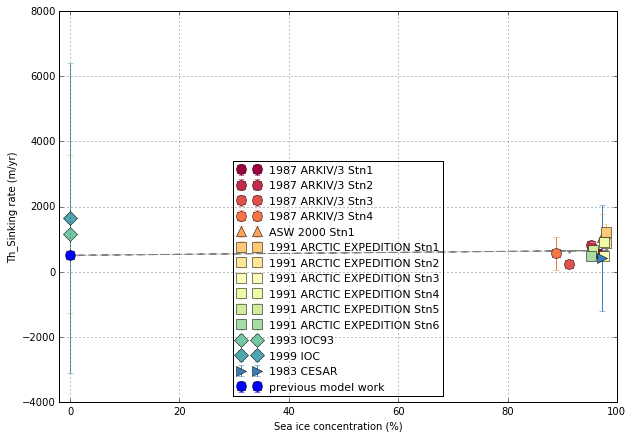

In [8]:
i=np.empty([file_num,1])
#for j in range(11):
#    data=pd.read_csv(nc_filename[j])
#    i[j,:]= data['ice'][0];
i= np.array([96.4,95.2,91.2,88.8,97.2,98,98,97.6,97.6,95.6,95.2,0,0,97.2]) #'remember to add i'
#marker=      ['o','o','o','o',   '^','s','s','s','s','s', 's','D','D','>']
    
err1=(WLS_err1/WLS_coef1)*1/WLS_coef1*0.0267
#((WLS_err1/WLS_coef1)**2)**(0.5)
sinking_rate=numpy.append(sinking_rate,500)
i=numpy.append(i,0)
err1=numpy.append(err1,0.0001)
i2 = sm.add_constant(i,prepend=False)
mod_wls3 = sm.WLS(sinking_rate,i2,weights=1./err1) #Is it the real error?
res_wls3 = mod_wls3.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls3.fittedvalues, '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],sinking_rate[j],yerr=err1[j],fmt=marker[j],markersize=10,c=cm.Spectral(j*18),label=name)

ax.errorbar(i[-1],sinking_rate[-1], yerr=err1[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0, fontsize=11)#,bbox_to_anchor=(1.45,1))
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Sinking rate (m/yr)')

#ax.set_ylim([0, 5000])
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [9]:
print res_wls3.summary()

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            WLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     3.490
Date:                Wed, 08 Jul 2015   Prob (F-statistic):             0.0844
Time:                        13:35:46   Log-Likelihood:                -72.317
No. Observations:                  15   AIC:                             148.6
Df Residuals:                      13   BIC:                             150.1
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.5180      0.813      1.868      0.084        -0.237     3.273
const        499.9999      0.323   1550.021      0.0

/home/xiaoxiny/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1205: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  int(n))


In [10]:
from statsmodels.formula.api import wls
from scipy.stats import f as scist
data = pd.DataFrame({'sinking_rate':sinking_rate, 'i3': i})
mod_wls5 = wls('sinking_rate~i3', data,weights=1./(err1))
res_wls5 = mod_wls5.fit()
#print res_wls5.summary()

In [11]:
a=average(sinking_rate)
#print a
#print sinking_rate

In [12]:
rss=(sinking_rate-a)**2
rss_sum=sum(rss)
p1 = 1
p2 = 2
n = file_num
F = (rss_sum - res_wls5.mse_resid)/(res_wls5.mse_resid) *(n-p2)/(p2-p1)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('F ratio: %s'%F)
print ('ftest:%s'%p)

F ratio: 22882.7970465
ftest:1.11022302463e-16


# WLS: K value and the ice concentration

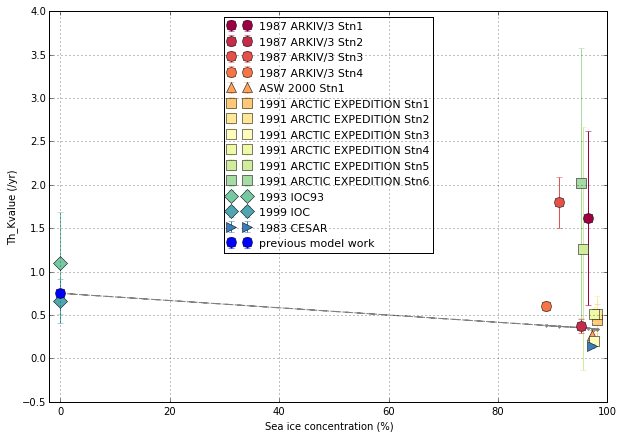

In [13]:
err2=WLS_err2/WLS_coef2*Kvalue
#err2= ((WLS_err1/WLS_coef1)+(WLS_err2/WLS_coef2))* WLS_coef1/WLS_coef2*1.6# error of k value K-1=1
#(WLS_coef1**(-4)*(WLS_coef2**(-2))*(WLS_err1)**2+WLS_coef2**(-4)*(WLS_coef1**(-2))*(WLS_err2)**2)**(0.5)
#((WLS_err1/WLS_coef1)**2+(WLS_err2/WLS_coef2)**2)**(0.5) # error of k value K-1=1

Kvalue=numpy.append(Kvalue,0.75)
err2=numpy.append(err2,0.0001)

mod_wls4 = sm.WLS(Kvalue, i2, weights=1./err2)
res_wls4 = mod_wls4.fit()

fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(i, res_wls4.fittedvalues,  '--.',color='grey')
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    name= data['name'][0];
    errorbar(i[j],Kvalue[j],yerr=err2[j],fmt=marker[j],markersize=10,c=cm.Spectral(j*18),label=name)
errorbar(i[-1],Kvalue[-1], yerr=err2[-1], fmt='o',markersize=10,c='blue',label='previous model work')
ax.legend(loc=0,fontsize=11)
plt.xlabel('Sea ice concentration (%)')
plt.ylabel('Th_Kvalue (/yr)')
ax.set_xlim([-2, 100])
plt.grid()
plt.show()

In [14]:
print res_wls4.summary() 

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            WLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     20.53
Date:                Wed, 08 Jul 2015   Prob (F-statistic):           0.000564
Time:                        13:35:47   Log-Likelihood:                -21.302
No. Observations:                  15   AIC:                             46.60
Df Residuals:                      13   BIC:                             48.02
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0042      0.001     -4.531      0.001        -0.006    -0.002
const          0.7501      0.011     69.765      0.0

In [15]:
#f-test k value

In [16]:
from statsmodels.formula.api import wls
from scipy.stats import f as scist
data = pd.DataFrame({'Kvalue':Kvalue, 'i3': i})
mod_wls6 = wls('Kvalue~i3', data,weights=1./(err2))
res_wls6 = mod_wls6.fit()
print res_wls6.summary()

                            WLS Regression Results                            
Dep. Variable:                 Kvalue   R-squared:                       0.612
Model:                            WLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     20.53
Date:                Wed, 08 Jul 2015   Prob (F-statistic):           0.000564
Time:                        13:35:47   Log-Likelihood:                -21.302
No. Observations:                  15   AIC:                             46.60
Df Residuals:                      13   BIC:                             48.02
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7501      0.011     69.765      0.000         0.727     0.773
i3            -0.0042      0.001     -4.531      0.0

In [17]:
b=average(Kvalue)

In [18]:
#rss2=(Kvalue-b)**2*(1./(err2**2))
rss2=(Kvalue-b)**2
rss2_sum=sum(rss2)
p1 = 1
p2 = 2
n = file_num
F = (rss2_sum - res_wls6.mse_resid)/(res_wls6.mse_resid) *(n-p2)/(p2-p1)
p = 1.0 - scist.cdf(F,p2-p1,n-p2)
print ('rss(model constant):%s'%rss2_sum)
print ('rss(model 2df):%s'%res_wls6.mse_resid)
print ('F ratio: %s'%F)
print ('pvalue:%s'%p)

rss(model constant):5.07091244969
rss(model 2df):1.15664894538
F ratio: 40.6096960008
pvalue:3.54354518005e-05


# map

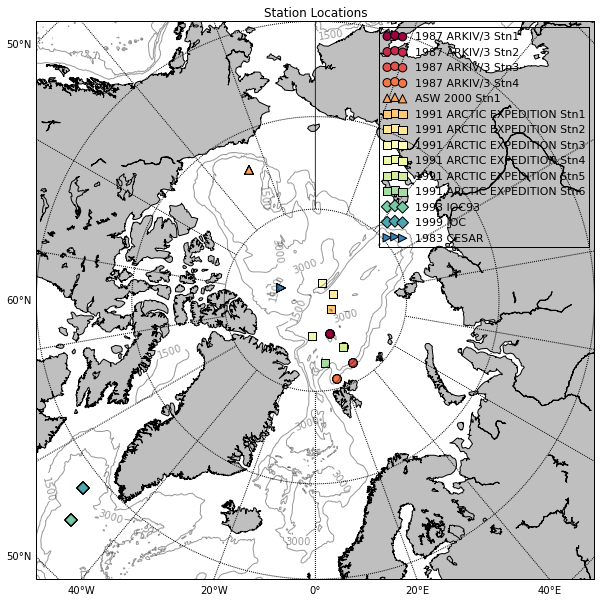

In [51]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

# create Basemap instance.
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th/*.csv'))
for j in range(file_num):
    data=pd.read_csv(nc_filename[j])
    lon = data['long.'];
    name= data['name'][0];
    lat = data['lat.'];
    x,y = m(lon.values,lat.values)
    m.scatter(x,y,color=cm.Spectral(j*18),marker=marker[j],s=70,label=name,edgecolors='black')


url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  

m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

plt.title("Station Locations")
plt.legend(loc=1,fontsize=11)

plt.show()